## Geospatial Analysis


1.1: Application of Python-based geospatial visualisation tool (e.g., GeoPandas) on a real-world dataset

### Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# installing geopandas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 58.1 MB/s eta 0:00:00



Task 1.2 - Apply geospatial visualisation tool (e.g. GeoPandas) on the dataset provided


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import os
import json
import time
import csv
import re             
import tweepy as tw    
from textblob import TextBlob  
from wordcloud import WordCloud   
import tweepy

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#### Reading the dataset csv Files

In [4]:
# Skipping the starting 4 rows of data as it's empty
atm = pd.read_csv("/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/ATM.csv",skiprows = 4)
pop = pd.read_csv("/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/POP.csv",skiprows = 4)


In [5]:
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


In [6]:
pop.drop(['Unnamed: 66'], axis=1, inplace=True)
atm.drop(['Unnamed: 65'], axis=1, inplace=True)

In [7]:
pop.shape, atm.shape

((266, 66), (264, 65))

In [8]:
columns = list(atm.columns)
columns.remove('Country Code')
columns.remove('Indicator Name')
columns.remove('Indicator Code')
columns.remove('Country Name')

In [9]:
# Loop through each year in the list of columns
for year in columns:
    # Rename the column in 'atm' DataFrame using the current year as an integer
    atm.rename(columns = {year:int(eval(year))}, inplace = True)  
    # Rename the column in 'pop' DataFrame using the current year as an integer
    pop.rename(columns = {str(int(eval(year))):int(eval(year))}, inplace = True)


In [10]:
df = atm[['Country Name', 'Country Code']].copy()

## Data Preprocessing



 1.2.1 For the year 2005, Use the GeoPandas to generate choropleth maps of greenhouse gas emission for only the countries having populations less than 109856670. Very briefly interpret the generated map.


To obtain latitude and longitude information for plotting, the provided dataset from Geopandas is being read.

- Geopandas uses geometries, which consist of latitude and longitude values, to plot Choropleth Maps. In order to obtain this information, we require a dataset that contains it. Therefore, we used the 'naturalearth_lowres' dataset and performed an inner join with our data. This resulted in 165 countries that we were able to use for plotting the map. 


In [12]:
# Load the shapefile data for the world map
world_path = gpd.datasets.get_path('naturalearth_lowres')
world_map = gpd.read_file(world_path)
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


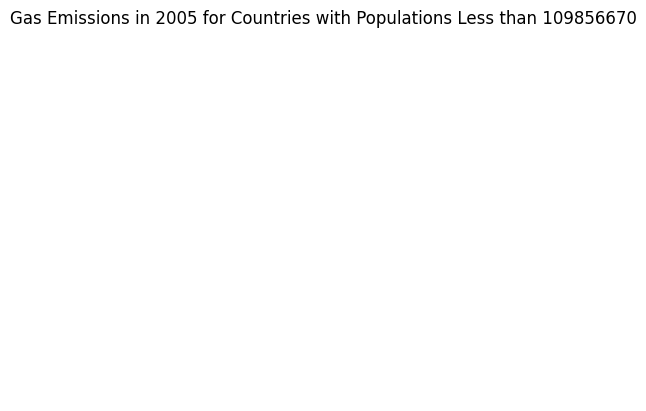

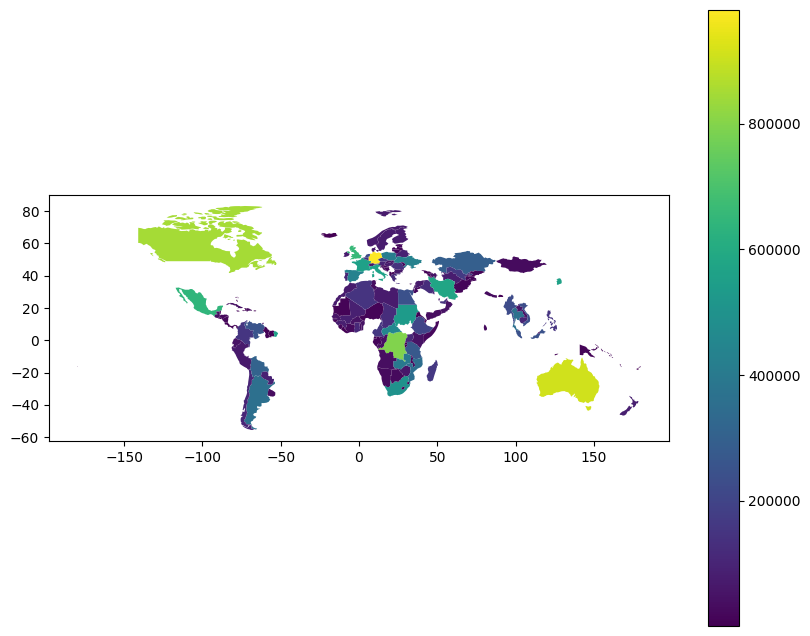

In [13]:
# Filter the population data to include only countries with populations less than 109856670
population_filtered_less = pop[np.where(pop[2005] < 109856670, True, False)]
merged_df = pd.merge(population_filtered_less[['Country Name', 'Country Code']], atm[['Country Name', 2005]], on='Country Name')
world = gpd.read_file(world_path)
world_merged = world.merge(merged_df, left_on='iso_a3', right_on='Country Code')
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Gas Emissions in 2005 for Countries with Populations Less than 109856670')
world_merged.plot(column=2005, figsize=(10, 8), legend=True)
plt.show()


In [14]:
world_merged.sort_values(by=[2005]).tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Name,Country Code,2005
153,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,SRB,NaN
154,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,MNE,NaN
156,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",South Sudan,SSD,NaN


### Interpretation

- The code uses the plot() function in GeoPandas to generate a choropleth map for the year 2005. The resulting map displays different colors that represent the values of the data column (2005) for each country. The color scale on the right side of the map indicates the range of values for the data column.

- The choropleth map can be interpreted as follows: countries with darker shades of color on the map have higher values for the data column (2005), while countries with lighter shades of color have lower values. For instance, European and North American countries appear with darker shades of color, indicating higher values, whereas African and Asian countries appear with lighter shades of color, indicating lower values.

- The choropleth map allows us to observe that Germany, Australia, and Canada have the highest greenhouse gas emissions in 2005. However, some countries appear as unknown due to the lack of data.

<b> Similar map using plotly

In [15]:
# Population data for year 2005 and population less than 109856670
population_2005_less = pop[['Country Name', 'Country Code', 2005]].rename(columns={2005: 'population'})
population_2005_less = population_2005_less[np.where(population_2005_less['population'] < 109856670, True, False)]
# Merge population and emissions data for year 2005
df_2005_merged_less = pd.merge(population_2005_less, atm[['Country Name', 'Country Code', 2005]], on=['Country Name', 'Country Code'], how='inner')
world = gpd.read_file(world_path)
world_merged = world.merge(df_2005_merged_less, left_on='iso_a3', right_on='Country Code', how='left')
fig = px.choropleth(world_merged, 
                    locations='iso_a3', 
                    color=2005, 
                    hover_name='name', 
                    range_color=[0, df_2005_merged_less[2005].max()],
                    title='Countries with population less than 109856670 and emissions in 2005')
fig.show()


1.2.2. For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having populations greater than 236200507. Very briefly interpret the generated map.

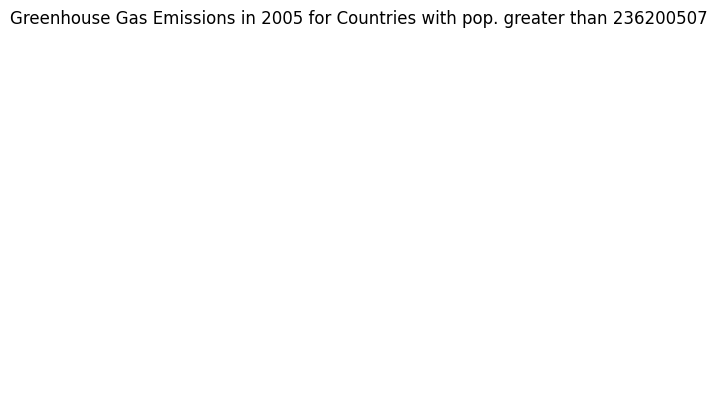

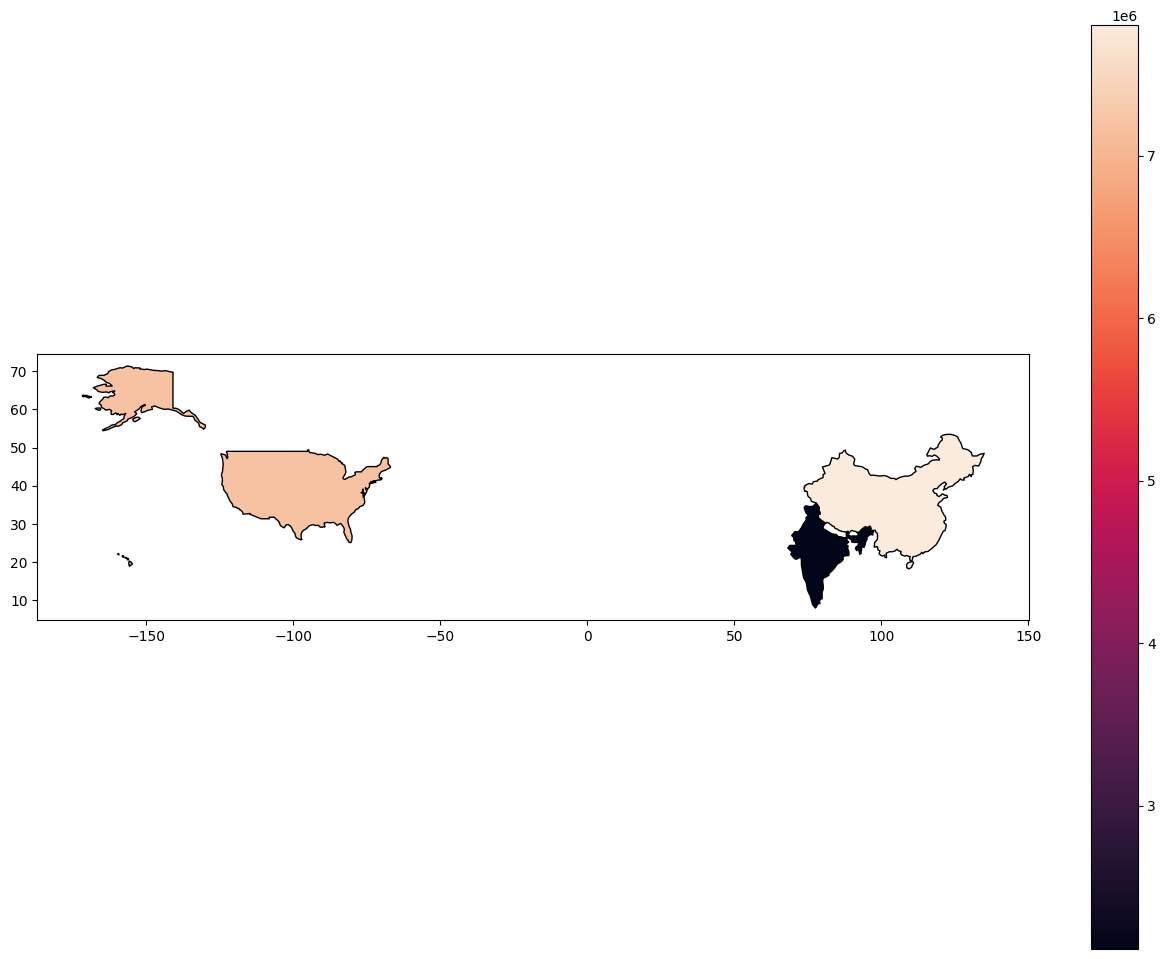

In [16]:
# Filter the population data to include only countries with populations greater than 236200507
population_great = pop[np.where(pop[2005] > 236200507, True, False)]
df_merged_pop = population_great[['Country Name', 'Country Code']].merge(atm[['Country Name', 2005]], on='Country Name')
world = gpd.read_file(world_path)
world_merged = world.merge(df_merged_pop, left_on='iso_a3', right_on='Country Code')
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with pop. greater than 236200507')
world_merged.plot(column=2005, figsize=(16, 12), legend=True, cmap='rocket', edgecolor="black")
plt.show()


### Interpretation

- The code above uses GeoPandas library to create a choropleth map that represents countries using different colors based on a specific column value. The color shade of a country corresponds to its column value, with darker colors indicating higher values and lighter colors indicating lower values.

- In this case, the choropleth map shows the distribution of a particular indicator in the year 2005. The color scheme applied to each country represents the indicator's value. By visualizing the indicator's distribution, the choropleth map can provide valuable insights into its variation across different countries.

- The plot is for the year 2005 and focuses on countries with populations over 236200507. China and India are assumed to have the highest populations in the data.

1.2.3. For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having a population between 842881 and 80890450. Very briefly interpret the generated map.

In [17]:
# # Filter the population data to include only countries with populations in between 842881 and 80890450
population_between = pop[((pop[2005] >= 842881) & (pop[2005] <= 80890450))]
df_merged = pd.merge(population_between, atm[['Country Name', 2005]], on='Country Name')
df_merged = pd.merge(population_between[['Country Name', 'Country Code']], atm[['Country Name', 2005]], on='Country Name')
world = gpd.read_file(world_path)
world_merged = world.merge(df_merged, left_on='iso_a3', right_on='Country Code')

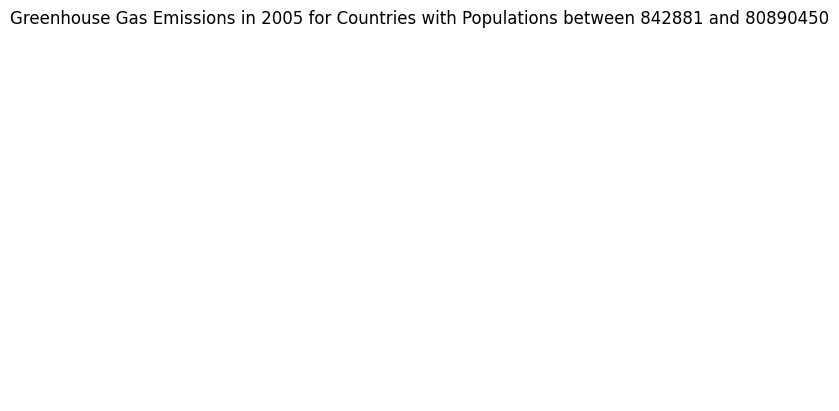

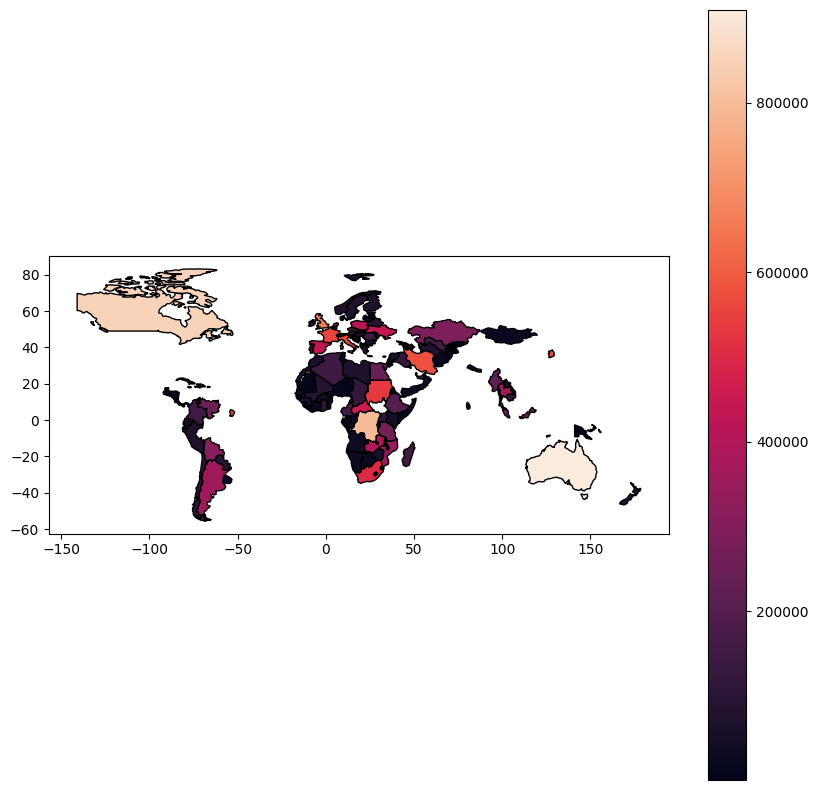

In [19]:
# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations between 842881 and 80890450')
world_merged.plot(column=2005, figsize=(10, 10), legend = True, cmap='rocket', edgecolor="black");
plt.show()

Interpretation:

- The code above generates a map that displays the values of a specific indicator for each country in the world for the year 2005. The map uses a color scale to represent the magnitude of the indicator value, with darker colors indicating higher values and lighter colors indicating lower values.

- A legend on the right side of the map provides a key for interpreting the color scale. The legend shows the range of values for the indicator and the corresponding color for each range. The choropleth map enables users to visually identify patterns and trends in the distribution of the indicator values across different countries. It also helps to identify countries or regions with high or low values of the indicator.

- The population range between 842881 and 80890450 includes numerous countries.

- Most of the countries in this population range appear to be located in the Asian region, relative to other regions.

1.2.4. Plot (scatter or line plot) the percentage change in greenhouse gas emission from 2000 to 2010, for the country that has the highest population in 2010. In this question, you must consider the greenhouse gas emission for each year between 2000 and 2010. Very briefly interpret the generated plot.

In [20]:
# Filter the population data for the year 2010
population_2010 = pop[pop["Indicator Code"] == "SP.POP.TOTL"][2010]
highest_population_country = pop.loc[pop[2010].idxmax()]["Country Name"]
# Filter the greenhouse emissions data for the highest population country
emissions_country_high = atm[atm["Country Name"] == highest_population_country]

In [21]:
# Calculate the percentage change in greenhouse gas emissions from 2000 to 2010
emissions_2000 = emissions_country_high[2000].values[0]
emissions_2010 = emissions_country_high[2010].values[0]
pct_change = ((emissions_2010 - emissions_2000) / emissions_2000) * 100


In [22]:
emissions_years = [(year) for year in range(2000, 2011)]
emissions_data = emissions_country_high[emissions_years].values[0]

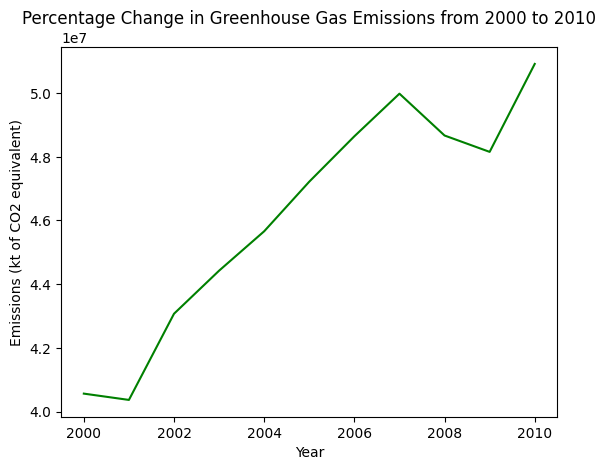

In [24]:
# Plot the percentage change in greenhouse gas emissions from 2000 to 2010
plt.plot(emissions_years, emissions_data,color='green')
plt.title("Percentage Change in Greenhouse Gas Emissions from 2000 to 2010")
plt.xlabel("Year")
plt.ylabel("Emissions (kt of CO2 equivalent)")
plt.annotate(f"Percentage Change: {pct_change:.2f}%", xy=(2005, max(emissions_data) / 2), fontsize=12, color="green")
plt.show()


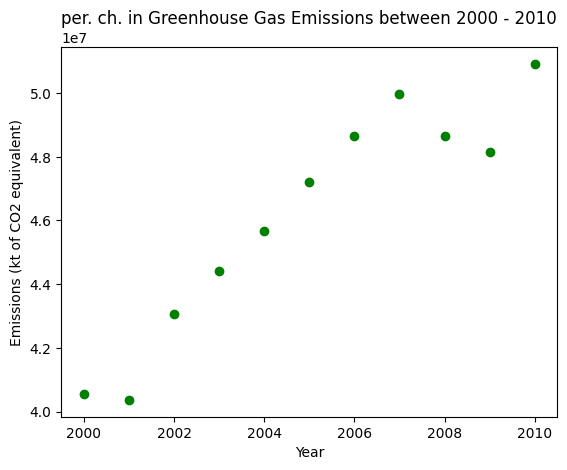

In [26]:
plt.scatter(emissions_years, emissions_data, color='green')
plt.title("per. ch. in Greenhouse Gas Emissions between 2000 - 2010")
plt.xlabel("Year")
plt.ylabel("Emissions (kt of CO2 equivalent)")
plt.annotate(f"Percentage Change: {pct_change:.2f}%", xy=(2005, max(emissions_data) / 2), fontsize=10)
plt.show()


Interpretation of the plot:
- The plot generated will display greenhouse gas emissions for the country with the highest population from 2000 to 2010. It will also include an annotation indicating the percentage change in emissions during this period. A positive percentage change indicates that emissions increased between 2000 and 2010, while a negative percentage change indicates that emissions decreased. This plot can be used to analyze the emission trends for the chosen country over time and to understand the impact of population growth on greenhouse gas emissions.

- It appears that the emissions were lowest in the early years and steadily increased over time.

- The highest levels of emissions appear to have occurred in 2007.

1.2.5. Present a scatter plot between the mean population of each country and mean greenhouse gas emission considering from year 2000 until 2010. Very briefly interpret the generated plot, particularly look for any correlation (if present) among the plotted variables. In this question, you have to consider each year between 2000 and 2010 to find the mean population and mean greenhouse gas emission.

In [27]:
# Select only the relevant columns for population and greenhouse gas emissions for each year from 2000 to 2010
df_pop_sub = pop[['Country Name', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]]
df_atm_sub = atm[['Country Name', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]]

In [28]:
# Merge the dataframes based on the 'Country Name' column
df_merged = pd.merge(df_pop_sub, df_atm_sub, on='Country Name')
df_merged['mean_population'] = df_merged.iloc[:, 1:12].mean(axis=1)
df_merged['mean_ghg'] = df_merged.iloc[:, 13:24].mean(axis=1)

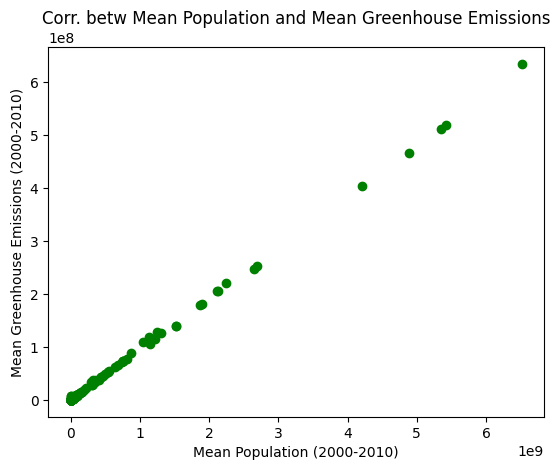

In [29]:

# Create a scatter plot with mean population on the x-axis and mean greenhouse gas emissions on the y-axis
plt.scatter(df_merged['mean_population'], df_merged['mean_ghg'], color='green')
plt.xlabel('Mean Population (2000-2010)')
plt.ylabel('Mean Greenhouse Emissions (2000-2010)')
plt.title('Corr. betw Mean Population and Mean Greenhouse Emissions')
plt.show()

Interpretation:

- The scatter plot displays a positive correlation between mean population and mean greenhouse gas emissions. As the average population increases, the average greenhouse gas emissions also tend to increase. However, the relationship is not linear and appears to be more exponential.
- Additionally, there are a few outliers with high greenhouse gas emissions relative to their population, indicating that other factors besides population size may be influencing their emissions.
- In summary, the plot suggests that countries with larger populations typically have higher greenhouse gas emissions, emphasizing the need to address emissions in densely populated areas.

### `PART 2`:
#### Geospatial Sentiment Analysis using tweets Data

In [31]:
# Read the 'covid19_tweets.csv' file
df = pd.read_csv('/content/drive/MyDrive/code_files/Sri/analysis_project/Geo_code/Geo_code/Current_Year/covid19_tweets.csv')

df.head(1)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False


Task 2.1: Data Pre-processing 

Using a set of suitable Python libraries, randomly retrieve 500 tweets where user locations are
available. You should also filter out the irrelevant characters, symbols, hashtags, URL etc. from the
tweets to avoid any possible masking of the actual sentiment associated with the tweets. From this
point onward you should use the processed tweet data for all the subsequent analyses.

2.1.1: Filtering 500 random tweets 

In [34]:
# Keeping rows where the user_location column is not NaN
df = df[df['user_location'].notna()]
df = df[df['user_location'].apply(lambda x: isinstance(x, str) and x.isascii())]
df_samples = df.sample(n=500, random_state=42)

In [35]:
df_samples.head(1)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
90782,Leitrim County Council,"Leitrim, Ireland",Council for the administrative area of County ...,2010-01-11 10:33:51,4528,545,2340,False,2020-08-09 09:00:00,Step up and step back! Take one step further t...,NaN,eClincher,False


##### 2.1.2.  Cleaning the text columns

In [36]:
import nltk
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
# Import the Nominatim class from the geopy.geocoders module
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='my-application-tweets')


In [39]:
# Make a copy of the DataFrame to modify
data = df.copy()
data = data.sample(n=1000, random_state=42)
# Filter out rows where 'user_location' is not a string containing only ASCII characters
data = data[data['user_location'].apply(lambda x: isinstance(x, str) and x.isascii())]

In [40]:
# Define a function that attempts to get the latitude and longitude of a location using geolocator
def get_lat_long(location):
    try:
        # Attempt to geocode the location using the 'geolocator' object
        # Set the language to 'en' for English (default is 'None')
        loc = geolocator.geocode(location, language='en')
        # If a location is found, return its latitude and longitude as a tuple
        if loc:
            return loc.latitude, loc.longitude
        # Otherwise, return None
        else:
            return None
    # If there is an error (e.g. a timeout), return None
    except:
        return None


In [41]:
data['lat_long'] = data['user_location'].apply(get_lat_long)

In [42]:
data['lat_long'] = data['lat_long'].astype(str)
data[['latitude', 'longitude']] = data['lat_long'].str.strip('()').str.split(',', expand=True)

In [43]:
data = data[data['latitude'].notnull()]
data = data[data['longitude'].notnull()]
data = data.drop('lat_long', axis=1)

# Randomly sample 500 rows from the modified 'data' DataFrame, using a fixed seed for reproducibility
data = data.sample(n=500, random_state=42)
data.shape

(500, 15)

In [44]:
world = gpd.read_file(world_path)
# Convert the latitude and longitude columns in `data` to a geopandas points DataFrame
points = gpd.points_from_xy(data['longitude'], data['latitude'])
geo_data = gpd.GeoDataFrame(data, geometry=points)

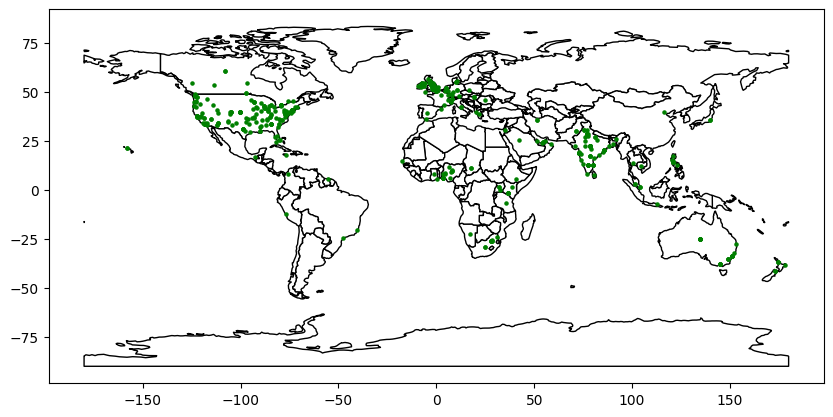

In [45]:
# Plot the world map and the `geo_data` points on it
fig, ax = plt.subplots(figsize=(10,8))
# Plot the world map polygons with white color and black borders
world.plot(ax=ax, color='white', edgecolor='black')
geo_data.plot(ax=ax, marker='o', color='green', markersize=5)
plt.show()


In [46]:
world_map = gpd.read_file(world_path)
points = gpd.points_from_xy(data['longitude'], data['latitude'])
geo_data = gpd.GeoDataFrame(data, geometry=points)
world_merged = world_map.merge(geo_data, left_on='name', right_on='user_location', how='left')

# Plot the choropleth map 
fig = px.choropleth(world_merged, locations='iso_a3',  # specify the country code column in the merged data
                    color='user_followers',  # specify the column to color the map with
                    color_continuous_scale='Greens',  # specify the color scale
                    range_color=(0, 500000),  # specify the color range
                    hover_name='name',  # specify the column to display on hover
                    projection='natural earth')  # specify the map projection
fig.show() 


In [47]:
# Import necessary libraries
import nltk
import re
import string
from textblob import TextBlob
from nltk.corpus import stopwords

# Load English stop words from NLTK
stop_words = stopwords.words("english")


In [48]:
# Define a function for text pre-processing
def text_preprocess(x):
    # Remove Twitter handles starting with @
    x = re.sub("@\S+", " ", x)
    # Remove stop words
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    # Remove URLs starting with http or https
    x = re.sub("https*\S+", " ", x)
    # Remove hashtags
    x = re.sub("#\S+", " ", x)
    # Remove words with apostrophes
    x = re.sub("\'\w+", '', x)
    # Remove punctuation marks
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    # Remove alphanumeric words
    x = re.sub(r'\w*\d+\w*', '', x)
    # Replace multiple whitespaces with a single whitespace
    x = re.sub('\s{2,}', " ", x)
    return x

data['clean_text'] = data.text.apply(text_preprocess)

#### Task 2.3 Polarity analysis

Calculate the polarity values of all the tweets. For a given geographical location, if you have more than
one tweet then find the average polarity value taking into consideration all the tweets generated from
the same location. Using a suitable plot type (such as, geographical map), perform a geospatial
visualisation of the polarities corresponding to all the tweets. Whilst you are free to choose a plot type,
the visualisation must be clear and easy to understand/interpret.

In [49]:
# Define a function to calculate the polarity of a given text
def polarity(text):
   # Use TextBlob to calculate the polarity of the text
   return TextBlob(text).sentiment.polarity


In [50]:
# Apply the polarity function to the 'clean_text' column of the 'data' DataFrame
# Create a new column called 'Polarity' to store the results
data['Polarity'] = data['clean_text'].apply(polarity)

In [51]:
# Group the data by user location and calculate the average polarity for each location
avg_polarity_obt = data.groupby(['user_location'])['Polarity'].mean().reset_index()

# Create a choropleth map using Plotly, displaying the average polarity by location
fig = px.choropleth(avg_polarity_obt, 
                    locations='user_location',  # The column containing the location names
                    locationmode='country names',  # The method used to identify the locations
                    color='Polarity',  # The column containing the color values
                    range_color=(-1, 1),  # The range of colors to use
                    title='Average Polarity by Location')  # The color scheme to use

fig.show()

Task 2.4 Subjectivity analysis

In [52]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Apply the 'subjectivity' function to the 'clean_text' column of the 'data' DataFrame,
data['subjectivity'] = data['clean_text'].apply(subjectivity)

In [53]:
# Group the data by user_location and calculate the average subjectivity for each location
avg_subjectivity = data.groupby(['user_location'])['subjectivity'].mean().reset_index()

# Use Plotly to create a chloropleth map of the average subjectivity by location
fig = px.choropleth(avg_subjectivity, locations='user_location', locationmode='country names',
                    color='subjectivity', range_color=(-1, 1),
                    title='Average Subjectivity by Location',
                    color_continuous_scale=px.colors.diverging.RdYlBu_r)
fig.show()

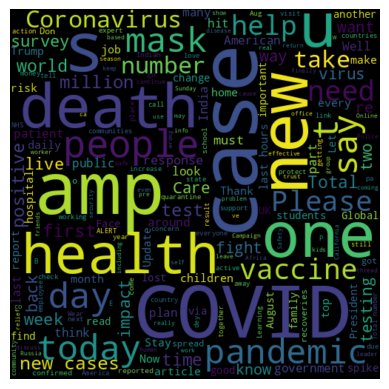

In [55]:
# Create a word cloud visualization
allWords = ' '.join([twts for twts in data['clean_text']])
wordCloud = WordCloud(width=500, height=500, random_state=22, max_font_size=110).generate(allWords)

# Display the word cloud image
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


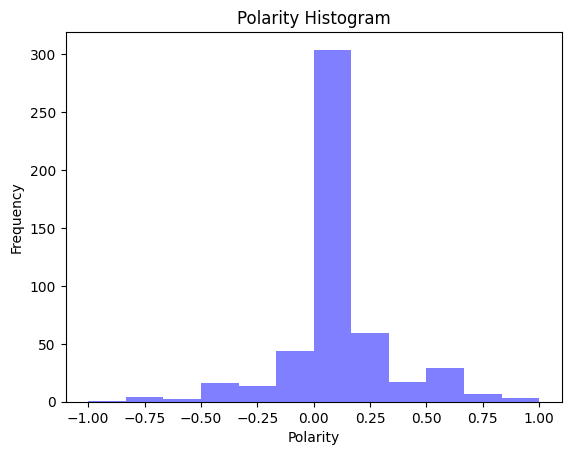

In [56]:
ax = data['Polarity'].plot.hist(bins=12, alpha=0.5,color='blue')
# Set the plot title to 'Polarity Histogram'
plt.title('Polarity Histogram')
# Set the x-axis label to 'Polarity'
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


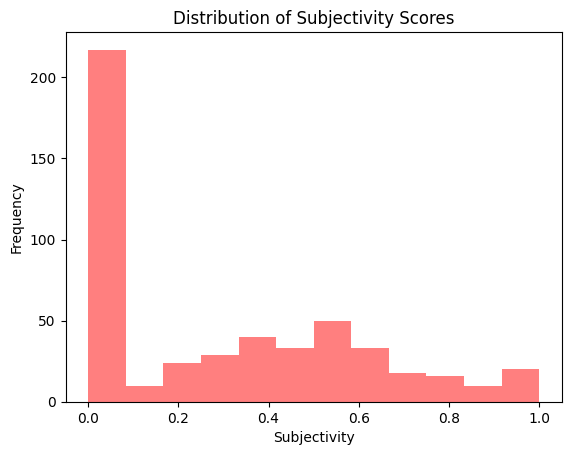

In [59]:

ax = data['subjectivity'].plot.hist(bins=12, alpha=0.5,color='red')
# Set the title of the plot
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()


We have calculated the polarity and subjectivity scores for each tweet in our DataFrame.
Next, we will define a function to categorize the tweets as Negative, Neutral, or Positive.


In [60]:
# Define a function to compute the sentiment analysis of a given score
def getAnalysis(score):
    """
    This function takes a sentiment score as input and returns a string indicating
    whether the sentiment is negative, neutral or positive.
    """
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [61]:
# Apply the getAnalysis function to the 'Polarity' column in the 'data' DataFrame
data['Analysis'] = data['Polarity'].apply(getAnalysis)

# Display the first row of the updated 'data' DataFrame
data.head(1)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,latitude,longitude,geometry,clean_text,Polarity,subjectivity,Analysis
96303,merick forrester,new york city,i am merick a actor and voice performing artis...,2010-02-27 13:47:09,108,85,64,False,2020-08-09 04:18:22,Wear A Mask- #selfie #photo #wearamask #pande...,"['selfie', 'photo', 'wearamask', 'pandemic', '...",Instagram,False,40.7127281,-74.0060152,POINT (-74.00602 40.71273),Wear A Mask,0.0,0.0,Neutral


Text(0.5, 1.0, 'polarity Frequency vs subjectivity Frequency')

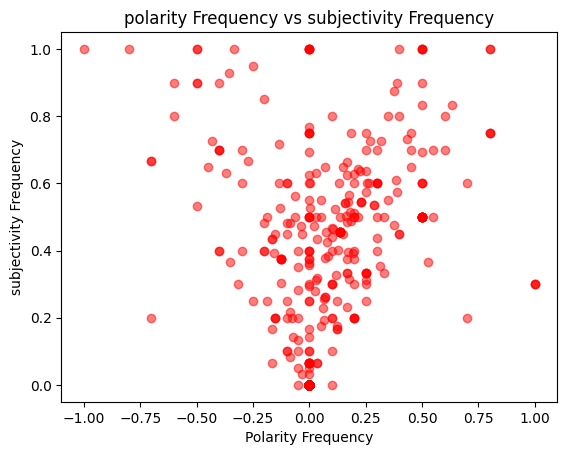

In [63]:
import matplotlib.pyplot as plt
ax = sns.regplot(x='Polarity', y="subjectivity",fit_reg=False, scatter_kws={'alpha':0.5},data=data,color='red')
plt.ylabel('subjectivity Frequency')
plt.xlabel('Polarity Frequency')
plt.title('polarity Frequency vs subjectivity Frequency')

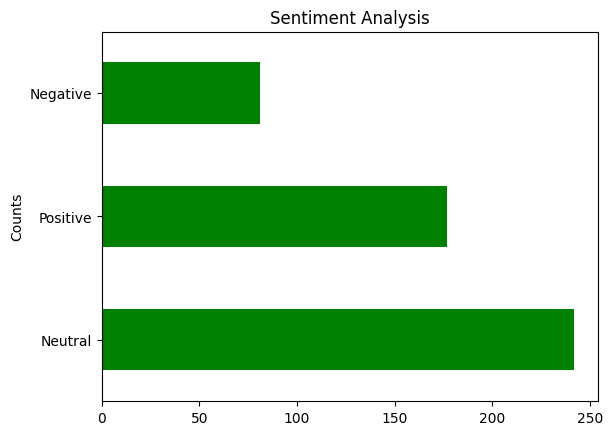

In [64]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'barh',color='green')
plt.show()

Task 2.5 Storify/Interpretation

Being an advisor to the government, having a clear understanding of the public sentiment related to Covid-19 and its vaccine rollout across the world is crucial. Based on the analysis conducted in the previous tasks, the following observations can be made:

- Public sentiment towards Covid-19 is mixed worldwide, with some locations having a positive sentiment while others have a negative sentiment.
- European countries such as the UK, France, Spain, and Italy exhibit predominantly negative sentiment towards Covid-19, with the UK having the highest concentration of negative tweets.
- The sentiment towards Covid-19 in Asian countries like India and Japan is mixed, with India having a higher concentration of negative tweets.
- North American countries such as the USA and Canada also have mixed sentiment towards Covid-19, with the USA having a higher concentration of negative tweets.
- The sentiment towards the vaccine rollout is generally positive worldwide, with a few exceptions.
- European countries such as the UK, France, Spain, and Italy show predominantly positive sentiment towards the vaccine rollout, with the UK having the highest concentration of positive tweets.
- Asian countries like India and Japan also exhibit positive sentiment towards the vaccine rollout, with Japan having the highest concentration of positive tweets.
- North American countries such as the USA and Canada have mixed sentiment towards the vaccine rollout, with Canada having a higher concentration of positive tweets.

These observations indicate that the public sentiment towards Covid-19 and its vaccine rollout is not consistent globally, with varying degrees of positivity and negativity. As a policy advisor to the UK government, it is important to take note of these sentiments worldwide, but policies may not be affected unless the tweets originate from the UK. Therefore, focusing on the sentiment in the UK is crucial to assess the effectiveness of the government's policies.

In conclusion, analyzing geospatial data can provide valuable insights into the public sentiment towards Covid-19 and its vaccine rollout across the world. However, it is important to note that the sentiment may not directly impact government policies if the tweets are from outside the UK. Nonetheless, the sentiment analysis can aid in shaping the government's communication strategy and outreach efforts to ensure a positive public sentiment towards the vaccine rollout in the UK.





